<h1>House Sales in King Country</h1>

This project will cover All steps about building a Ml project from scratch, from :
- Describing the Data set
- Importing Dataset
- Data Wrangling
- Exploratory Data Analysis
- Ml Model Development
- Model Evaluation and Refinement (R^2 and MSE)

<h3> About The Dataset</h3>

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from here.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [441]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import requests
%matplotlib inline

<h3>Import Dataset</h3>

In [442]:
# Define a download function
def download(filepath, filename):
    try:
        response = requests.get(filepath)
        response.raise_for_status()
        if response.status_code == 200:  
            with open (filename, "wb") as f:
                        f.write(response.content)

    except requests.exceptions.RequestException as e:
        print(f"An error occurred during the request: {e}")
    except IOError:
            print ("Error download and writing")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    else:
        print('Successfully done')

In [443]:
file_name="housing.csv"
# download(filepath, file_name)

In [444]:
# load csv file
df = pd.read_csv("housing.csv")
df.head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [445]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [446]:
# Statistical summary of df
df.describe(include='all')

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,21613,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10806.00000,4.580302e+09,NaN,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,NaN,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,NaN,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


<h4>Data Wrangling</h4>

In [447]:
# Check if our df contain missing values
missing_data = df.isnull()
missing_data

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [448]:
# count number of missing value in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

Unnamed: 0
Unnamed: 0
False    21613
Name: count, dtype: int64
 
id
id
False    21613
Name: count, dtype: int64
 
date
date
False    21613
Name: count, dtype: int64
 
price
price
False    21613
Name: count, dtype: int64
 
bedrooms
bedrooms
False    21600
True        13
Name: count, dtype: int64
 
bathrooms
bathrooms
False    21603
True        10
Name: count, dtype: int64
 
sqft_living
sqft_living
False    21613
Name: count, dtype: int64
 
sqft_lot
sqft_lot
False    21613
Name: count, dtype: int64
 
floors
floors
False    21613
Name: count, dtype: int64
 
waterfront
waterfront
False    21613
Name: count, dtype: int64
 
view
view
False    21613
Name: count, dtype: int64
 
condition
condition
False    21613
Name: count, dtype: int64
 
grade
grade
False    21613
Name: count, dtype: int64
 
sqft_above
sqft_above
False    21613
Name: count, dtype: int64
 
sqft_basement
sqft_basement
False    21613
Name: count, dtype: int64
 
yr_built
yr_built
False    21613
Name: count, dtype: int64
 
yr_ren

<p> We notice that bedrooms and bathrooms contains missing values</p>

In [449]:
missing_data_1= df[df[['bedrooms', 'bathrooms']].isna().any(axis=1)]
missing_data_1

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,875,6306400140,20140612T000000,1095000.0,NaN,NaN,3064,4764,3.5,0,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,1149,3421079032,20150217T000000,75000.0,1.0,NaN,670,43377,1.0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3119,3918400017,20150205T000000,380000.0,NaN,NaN,1470,979,3.0,0,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,3467,1453602309,20140805T000000,288000.0,NaN,1.50,1430,1650,3.0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,4868,6896300380,20141002T000000,228000.0,NaN,1.00,390,5900,1.0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
5832,5832,5702500050,20141104T000000,280000.0,1.0,NaN,600,24501,1.0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,6994,2954400190,20140624T000000,1295650.0,NaN,NaN,4810,28008,2.0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,8477,2569500210,20141117T000000,339950.0,NaN,2.50,2290,8319,2.0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,8484,2310060040,20140925T000000,240000.0,NaN,2.50,1810,5669,2.0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,9773,3374500520,20150429T000000,355000.0,NaN,NaN,2460,8049,2.0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050


<h3>Dealing with missing values</h3>

In [450]:
df.drop(columns=['id', 'Unnamed: 0'], axis= 1, inplace=True)
# Display statistical summary
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [451]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [452]:
# Let's replace the missing values of the column 'bedrooms' with the mean of the colum
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean, inplace= True)

/tmp/ipykernel_655746/1068202068.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan, mean, inplace= True)


In [453]:
mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, mean, inplace = True)

/tmp/ipykernel_655746/1856611534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].replace(np.nan, mean, inplace = True)


In [454]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


<p><b>Conclusion</b>, What we did in this section. Once we notice that there is mmissing value in our dataset, we tried to deal with them by replace the missing values rows by the mean of the columns. 
</p>

<h3> Exploratory Data Analysis </h3>

In [455]:
# count the number of houses with unique floor value
df['floors'].astype(int)
df['floors'].value_counts()
#convert the series in df
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


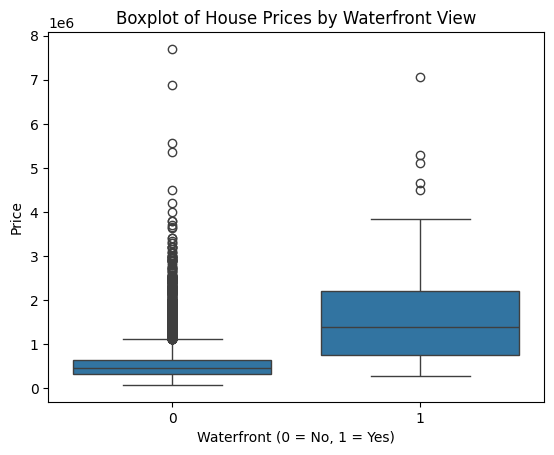

In [456]:
#determine whether houses with a waterfront view or without a waterfront view have more price outliers

# Create a boxplot
sns.boxplot(x="waterfront", y="price", data=df)

# Show the plot
plt.title("Boxplot of House Prices by Waterfront View")
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.show()


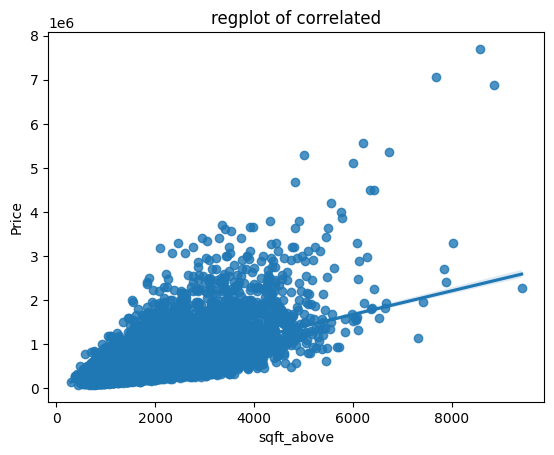

In [457]:
#  determine if the feature sqft_above is negatively or positively correlated with price
sns.regplot(x="sqft_above", y="price", data=df)
# Show the plot
plt.title("regplot of correlated")
plt.xlabel("sqft_above")
plt.ylabel("Price")
plt.show()


In [458]:
df.drop(columns=('date'), axis = 1, inplace= True)

In [459]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<h3> Model Developement</h3>

<h5> Linear Regression Model</h5>

In [460]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [461]:
A = df[['sqft_living']]
B = df['price']

# create the Linear regression object
lm1 = LinearRegression()
# fit the model
lm1.fit(A, B)
lm1.score(A, B)

0.4928532179037931

In [462]:
pred = lm1.predict(A)
pred[0:5]

array([287555.06702451, 677621.82640197, 172499.40418656, 506441.44998452,
       427866.85097324])

In [463]:
lm1.intercept_

np.float64(-43580.74309447396)

In [464]:
lm1.coef_

array([280.6235679])

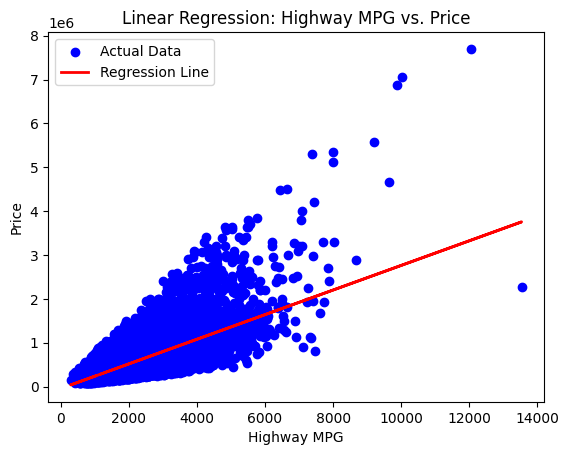

In [465]:
# Scatter plot of data points
plt.scatter(A, B, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(A, lm1.predict(A), color='red', linewidth=2, label='Regression Line')

# Add labels and a title
plt.xlabel('Highway MPG')
plt.ylabel('Price')
plt.title('Linear Regression: Highway MPG vs. Price')
plt.legend()

# Show the plot
plt.show()


<h5>Multiple Linear Regression Model</h5>

In [466]:
features = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]] 

In [467]:
lm2 = LinearRegression()
model = lm2.fit(features, B)
# Calculate the R^2 score using model.score()
R_2 = model.score(features, B)
R_2

0.6576737618613081

In [468]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [469]:
pipe =Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [470]:
# First, we convert the data type Z to type float to avoid conversion warnings that may appear 
# as a result of StandardScaler taking float input

Z = features.astype(float)
pipe.fit(features,B) # fit data

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [471]:
pred = pipe.predict(features)

In [474]:
# R^2
pipe.score(features, B)

0.7513410696207597

<h3> Model Evaluation</h3>

In [428]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [429]:
# Slit the data into train and test
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [430]:
from sklearn.linear_model import Ridge

In [475]:
# set the regulation parameter to 0.1
RigeModel=Ridge(alpha=1)

In [476]:
RigeModel.fit(x_train, y_train)

Ridge(alpha=1)

In [477]:
pred = RigeModel.predict(x_test)

In [479]:
r2 = r2_score(y_test, pred)

# Print R² score
print(f"R² score: {r2:.4f}")

R² score: 0.6478


In [435]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train, y_train)
    test_score, train_score = RigeModel.score(x_test, y_test), RigeModel.score(x_train, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:04<00:00, 247.32it/s, Test Score=0.563, Train Score=0.567]


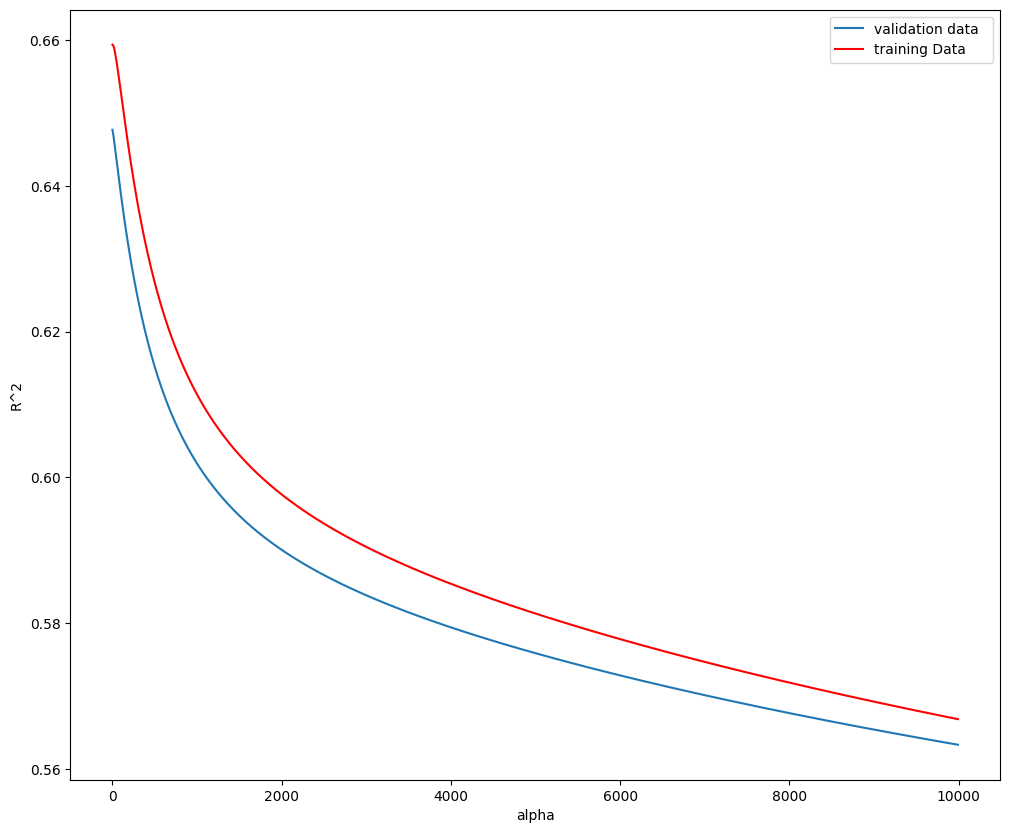

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

<h5> Use second order polynomial transform</h5>

In [ ]:
# Perform polynomial transformation (degree=2)
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Create and fit Ridge regression model with alpha=0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train_poly, y_train)

# Predict and calculate R² score
y_pred = ridge_model.predict(x_test_poly)
r2 = r2_score(y_test, y_pred)

# Print R² score
print(f"R² score: {r2:.4f}")

R² score: 0.7003
